In [1]:
import pandas as pd

In [5]:
df = pd.read_csv('./data.csv', sep='\t')

In [15]:
df

,Analyte Code,Analyte Name,Method,Less Than Ind.,Concentration,Concentration Value,Period Start,Period End
0,4010,COMBINED RADIUM (-226 & -228),NaN,NaN,5.2 PCI/L,5.2,2020-01-01,2020-03-31
1,4006,COMBINED URANIUM,908,NaN,0.7 PCI/L,0.7,2020-01-01,2020-03-31
2,4000,"GROSS ALPHA, EXCL. RADON & U",NaN,NaN,7.0 PCI/L,7.0,2020-01-01,2020-03-31
3,4020,RADIUM-226,903.1,NaN,2.6 PCI/L,2.6,2020-01-01,2020-03-31
4,4030,RADIUM-228,RA-05,NaN,2.6 PCI/L,2.6,2020-01-01,2020-03-31
...,...,...,...,...,...,...,...,...
117,4010,COMBINED RADIUM (-226 & -228),NaN,NaN,1.7 PCI/L,1.7,2024-10-01,2024-12-31
118,4002,"GROSS ALPHA, INCL. RADON & U",900,NaN,58.1 PCI/L,58.1,2024-10-01,2024-12-31
119,4100,GROSS BETA PARTICLE ACTIVITY,900,NaN,9.1 PCI/L,9.1,2024-10-01,2024-12-31
120,4020,RADIUM-226,903,NaN,1.7 PCI/L,1.7,2024-10-01,2024-12-31


In [14]:
df['Period Start'] = df['Period Start'].astype('datetime64[ns]')
df['Period End'] = df['Period End'].astype('datetime64[ns]')
df['Concentration Value'] = df['Concentration Value'].astype(float)

In [25]:
df['Period End'].unique()

<DatetimeArray>
['2020-03-31 00:00:00', '2021-03-31 00:00:00', '2022-03-31 00:00:00',
 '2023-03-31 00:00:00', '2024-03-31 00:00:00', '2025-03-31 00:00:00',
 '2026-03-31 00:00:00', '2027-03-31 00:00:00', '2020-06-30 00:00:00',
 '2021-06-30 00:00:00', '2022-06-30 00:00:00', '2023-06-30 00:00:00',
 '2024-06-30 00:00:00', '2025-06-30 00:00:00', '2026-06-30 00:00:00',
 '2027-06-30 00:00:00', '2019-09-30 00:00:00', '2020-09-30 00:00:00',
 '2021-09-30 00:00:00', '2022-09-30 00:00:00', '2023-09-30 00:00:00',
 '2024-09-30 00:00:00', '2019-12-31 00:00:00', '2020-12-31 00:00:00',
 '2021-12-31 00:00:00', '2022-12-31 00:00:00', '2023-12-31 00:00:00',
 '2024-12-31 00:00:00']
Length: 28, dtype: datetime64[ns]

In [16]:
import matplotlib.pyplot as plt

array([[<Axes: title={'center': 'Analyte Code'}>,
        <Axes: title={'center': 'Concentration Value'}>],
       [<Axes: title={'center': 'Period Start'}>,
        <Axes: title={'center': 'Period End'}>]], dtype=object)

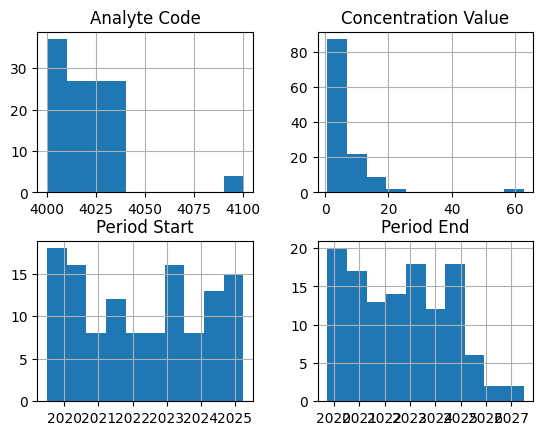

In [24]:
df.hist()

In [29]:
df.columns

Index(['Analyte Code', 'Analyte Name', 'Method', 'Less Than Ind.',
       'Concentration', 'Concentration Value', 'Period Start', 'Period End'],
      dtype='object')

In [31]:
df['Analyte Name'].unique()

array(['COMBINED RADIUM (-226 & -228)', 'COMBINED URANIUM',
       'GROSS ALPHA, EXCL. RADON & U', 'RADIUM-226', 'RADIUM-228',
       'GROSS ALPHA, INCL. RADON & U', 'GROSS BETA PARTICLE ACTIVITY'],
      dtype=object)

In [43]:
alerts = { 
    'COMBINED RADIUM (-226 & -228)': [pd.to_datetime('2024-04-11')],
    'GROSS ALPHA, INCL. RADON & U': [pd.to_datetime('2024-08-12'), pd.to_datetime('2025-06-13')]
}

In [44]:
limits = {
    'COMBINED RADIUM (-226 & -228)': 5,
    'COMBINED URANIUM': 20,
    'GROSS ALPHA, EXCL. RADON & U': 15,
    'RADIUM-226' : 5,
    'RADIUM-228': 5,
    'GROSS ALPHA, INCL. RADON & U': 15,
    'GROSS BETA PARTICLE ACTIVITY': 0,
}

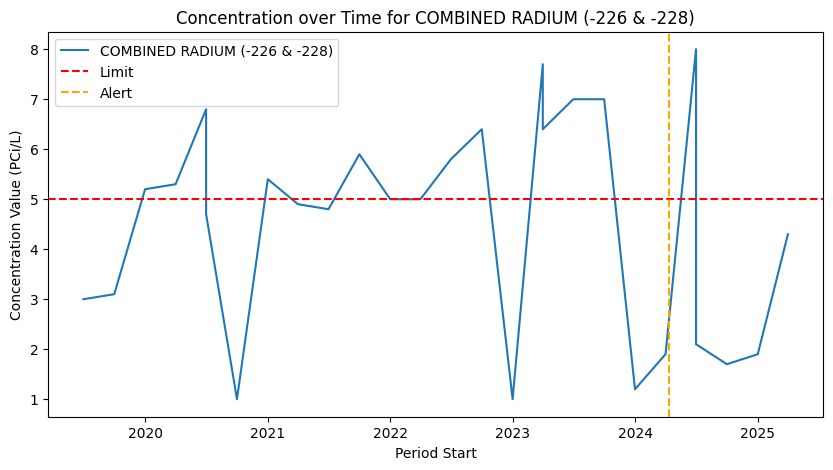

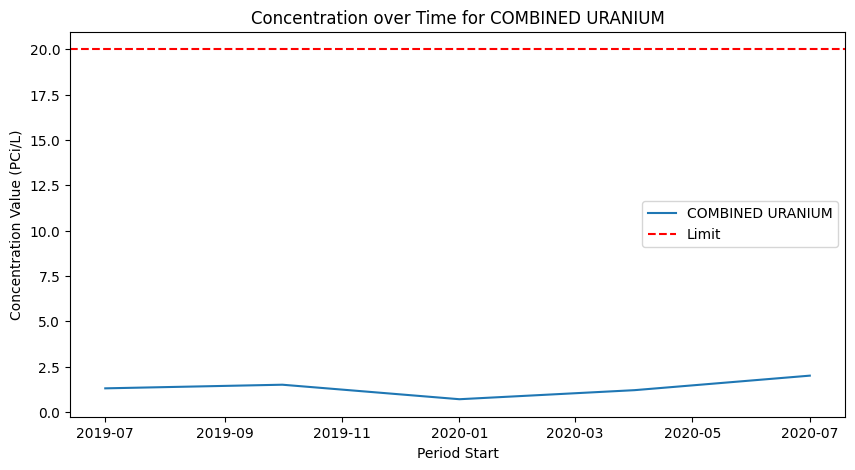

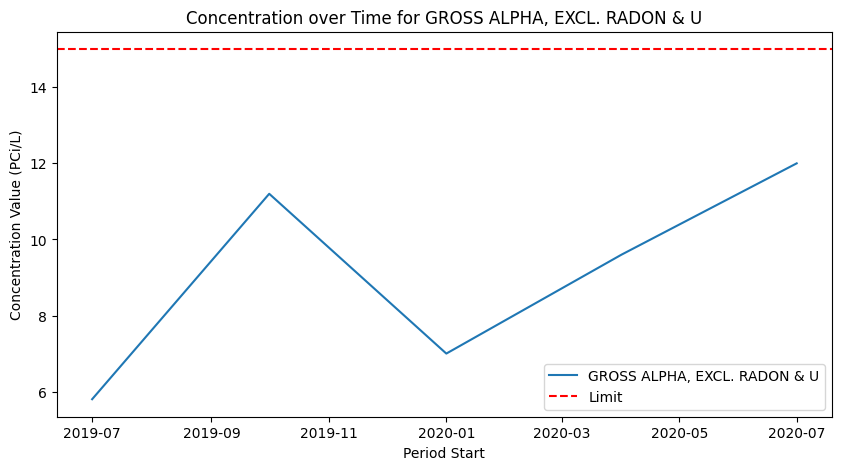

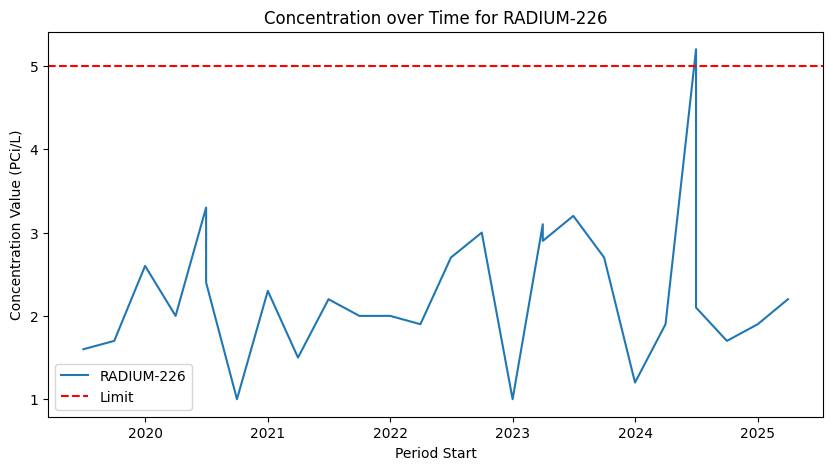

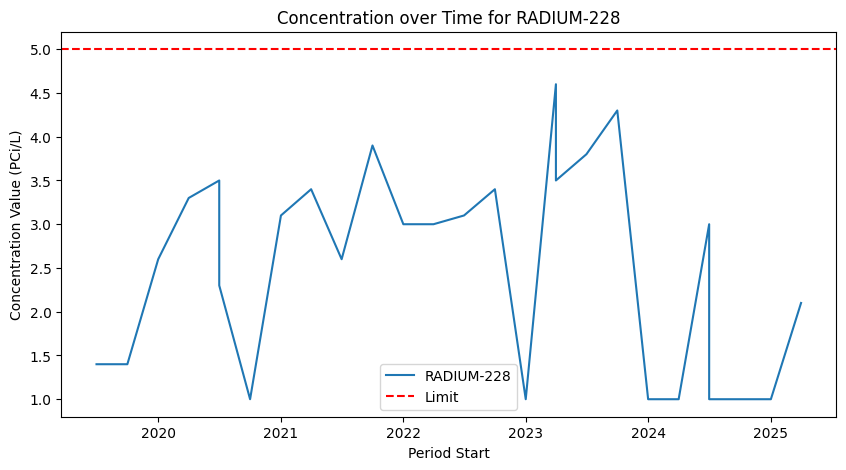

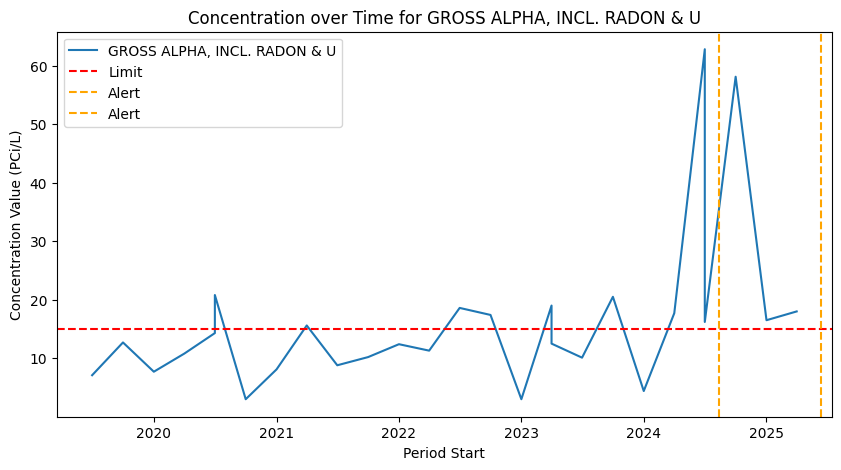

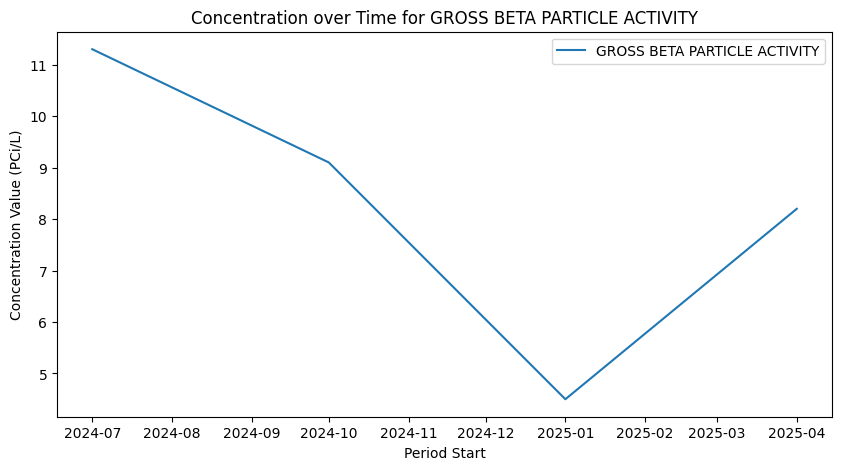

In [49]:
for analyte in df['Analyte Name'].unique():
    subset = df[df['Analyte Name'] == analyte]
    subset = subset.sort_values(by='Period Start')
    plt.figure(figsize=(10, 5))
    plt.plot(subset['Period Start'], subset['Concentration Value'], label=analyte)
    if limits[analyte] > 0:
        plt.axhline(y=limits[analyte], color='r', linestyle='--', label='Limit')
    if analyte in alerts:
        for alert_date in alerts[analyte]:
            plt.axvline(x=alert_date, color='orange', linestyle='--', label='Alert')
    plt.title(f'Concentration over Time for {analyte}')
    plt.xlabel('Period Start')
    plt.ylabel('Concentration Value (PCi/L)')
    plt.legend()
    plt.show()